## Contents
* [Introduction](#intro-bullet)
* [Reading the data](#first-bullet)
* [Describing the data](#second-bullet)
* [Exploring the fields](#third-bullet)

## Introduction <a class="anchor" id="intro-bullet"></a>
This jupyter notebook reads the card transaction data and explores all the fields in it. The plots and descriptive stats tables can be used to create a data quality report which can be further used to understand anomalies in data and what data cleaning steps should be involved before feeding into a machine learning model.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Reading the data <a class="anchor" id="first-bullet"></a>

In [18]:
df = pd.read_csv("card transactions.csv")

In [19]:
df.shape

(96753, 10)

In [20]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Date'].iloc[0]

Timestamp('2006-01-01 00:00:00')

In [23]:
df['Date'].iloc[0].strftime('%Y-%m-%d')

'2006-01-01'

## Describing the data <a class="anchor" id="second-bullet"></a>

In [29]:
numrecords = len(df)
numeric_columns = ['Amount','Date']
countMissingNumeric = df[numeric_columns].apply(lambda x: x.count() * 100 / numrecords)
countMissingNumeric.name = '% Populated'
zeroProportion = df[numeric_columns].apply(lambda x: len(x[x==0]) * 100 / numrecords)
data_describe = df[['Date','Amount']].describe(datetime_is_numeric=True)
data_describe.loc['mean','Date'] = np.nan
data_describe.loc['min','Date'] = data_describe.loc['min','Date'].strftime('%Y-%m-%d')
data_describe.loc['max','Date'] = data_describe.loc['max','Date'].strftime('%Y-%m-%d')
data_describe.loc['25%','Date'] = data_describe.loc['25%','Date'].strftime('%Y-%m-%d')
data_describe.loc['50%','Date'] = data_describe.loc['50%','Date'].strftime('%Y-%m-%d')
data_describe.loc['75%','Date'] = data_describe.loc['75%','Date'].strftime('%Y-%m-%d')



In [30]:

df_summary_numeric = data_describe.T
df_summary_numeric['% Zero'] = zeroProportion
df_summary_numeric['% Populated'] = df_summary_numeric['count']/numrecords*100
df_summary_numeric.loc['Date','% Populated'] = '{:,.2f}'.format(df_summary_numeric.loc['Date','% Populated'])
df_summary_numeric.loc['Date','% Zero'] = '{:,.2f}'.format(df_summary_numeric.loc['Date','% Zero'])
# df_summary_numeric = df_summary_numeric.filter(['% Populated','min','max','mean','std','% Zero','25%','50%','75%'])
# df_summary_numeric.loc['Amount'] = df_summary_numeric.loc['Amount'].apply('{:,.2f}'.format)
# df_summary_numeric

In [31]:
df_summary_numeric = df_summary_numeric.filter(['% Populated','min','max','mean','std','% Zero','25%','50%','75%'])
df_summary_numeric.loc['Amount'] = df_summary_numeric.loc['Amount'].apply('{:,.2f}'.format)
df_summary_numeric

,% Populated,min,max,mean,std,% Zero,25%,50%,75%
Date,100.00,2006-01-01,2006-12-31,NaN,NaN,0.00,2006-04-03,2006-06-27,2006-09-12
Amount,100.00,0.01,"3,102,045.53",427.89,"10,006.14",0.00,33.48,137.98,428.20


In [32]:
categorical = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [33]:
# for i in categorical:
#     df[i] = df[i].astype('str') 

In [34]:
# df['Merchnum'] = df['Merchnum'].str.zfill(9)
# df['Cardnum'] = df['Cardnum'].str.zfill(10)
# df['Merch zip'] = df['Merch zip'].str.zfill(5)

In [35]:
columnList = []
for i in categorical:
    fieldName = i
    nonMissing = df[i].count() * 100 / numrecords
    uniqueValues = len(df[i].unique())
    mode = df[i].mode()[0]
    column = pd.Series({'Field Name':fieldName,'% Populated': nonMissing, '# Unique Values':uniqueValues,'Most Common Value': mode})
    columnList.extend([column])
df_summary_category = pd.DataFrame(columnList).set_index('Field Name').round(2)
df_summary_category['# Unique Values'] = df_summary_category['# Unique Values'].apply('{:,.0f}'.format)
df_summary_category

,% Populated,# Unique Values,Most Common Value
Field Name,,,
Recnum,100.00,"96,753",1
Cardnum,100.00,"1,645",5142148452
Merchnum,96.51,"13,092",930090121224
Merch description,100.00,"13,126",GSA-FSS-ADV
Merch state,98.76,228,TN
Merch zip,95.19,"4,568",38118.0
Transtype,100.00,4,P
Fraud,100.00,2,0


In [36]:
df['Date'].value_counts()

2006-02-28    684
2006-08-10    610
2006-03-15    594
2006-09-13    564
2006-08-09    536
             ... 
2006-02-20     11
2006-10-03     10
2006-01-16      9
2006-10-17      6
2006-12-26      6
Name: Date, Length: 365, dtype: int64

In [37]:
df['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
6000320306474       1
08-3508297709       1
938090191224        1
8098605585362       1
5104024408152       1
Name: Merchnum, Length: 13091, dtype: int64

In [38]:
df['Merch description'].value_counts()


GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
BRUMLEY & ASSOCIATES INC       1
KRISTA MICRO INC               1
RITE AID 5326 THRIFTY          1
GATEWAY RPL                    1
RADIO SHACK   00119560         1
Name: Merch description, Length: 13126, dtype: int64

## Exploring the fields <a class="anchor" id="third-bullet"></a>

In [39]:
def plotfield(column,title = '', ylabel = '',xlabel = '', figsize = (20,10), annotate = False, topn = 15,logscale = False,rotation = 0,isnum = False,removeOutliers = False,outlierLimit = (0,0),horizontal = False):
    """
    Generic function to plot fields in data. For categorical fields, bar chart is used by default and for numeric fields histogram is used.
    
    Args:
    column(str): field to plot
    title(str): Title of the plot
    ylabel(str): y axis label to be used for the chart
    xlabel(str): x axis label to be used for the chart
    figsize(tuple): size of the figure
    annotate(bool): Whether to annotate bar charts for categorical fields
    topn(int): How many top values for the categorical fields to show on chart
    logscale(bool): Whether to convert the y scale to log
    rotation(float or int): Rotation for x axis labels. By default value is 0 
    isnum(bool): whether the field is numeric. By default false
    removeOutliers: whether to remove outliers before plotting. By default false
    outlierLimit(tulple): tuple indicating lower and upper limits for outliers in form (lower,upper).
                         Is used only if removeOutliers is true. 
    horizontal(bool): Used in case of categorical fields to indicate whether the bar chart should be horizontal.
                        By default false.
    
    Note: annotate currently only works for bar plots (categorical fields). There can be improvements made in the function to make 
    it easier to use. The only objective for creating this function was to avoid repeating code everytime we wanted to plot a new field.
    
    """
    sns.set(font_scale=2)
    sns.set_style("white")
    plt.figure(figsize = figsize)
    if not isnum:
        if not horizontal:
            ax = df[column].value_counts().head(topn).plot(kind='bar')
        else:
            ax = df[column].value_counts().head(topn).sort_values().plot(kind='barh')
    else:
        col = df[column]
        if removeOutliers:
            col = col[(col>outlierLimit[0]) & (col<outlierLimit[1]) ]
        ax = col.plot(kind = 'hist')
    plt.xticks(rotation = rotation)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if logscale:
        plt.yscale('log')
    if annotate:
        for bar in ax.patches:
            ax.annotate(format(bar.get_height(), '.0f'),
                           (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                           size=20, xytext=(0, 8),
                           textcoords='offset points')
    return ax

### Recnum 



In [40]:
len(df['Recnum'].unique()) == len(df)

True

In [41]:
df['Recnum'].value_counts()

2049     1
21856    1
7529     1
5480     1
28007    1
        ..
31386    1
25241    1
27288    1
4759     1
2047     1
Name: Recnum, Length: 96753, dtype: int64

### Cardnum

<AxesSubplot:title={'center':'Top 15 Card numbers'}, xlabel='Card Numbers', ylabel='Number of records '>

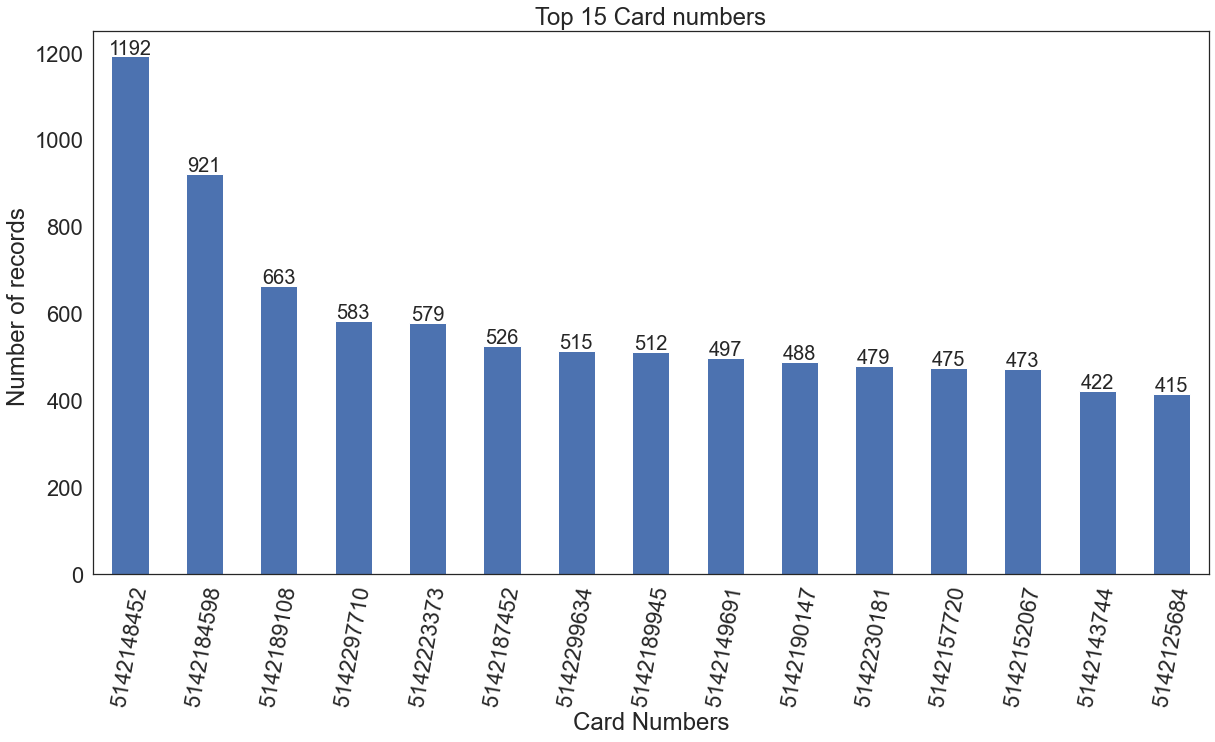

In [42]:
plotfield('Cardnum',annotate = True,title = 'Top 15 Card numbers',ylabel = 'Number of records ',xlabel = 'Card Numbers',logscale = False,rotation = 80)

### Date

Text(0, 0.5, 'Number of records')

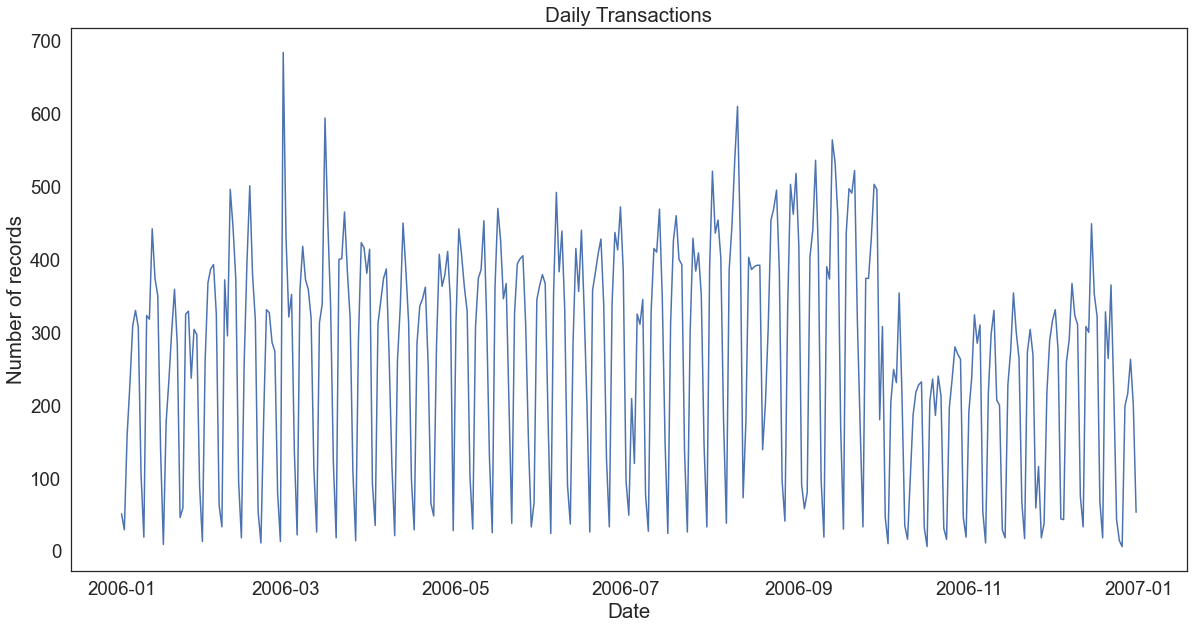

In [43]:
count_by_date = df.groupby('Date').Recnum.count()
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.7)
sns.set_style('white')
sns.lineplot(x = count_by_date.index , y = count_by_date.values)
plt.title("Daily Transactions")
plt.xlabel("Date")
plt.ylabel("Number of records")

Text(0, 0.5, 'Number of records')

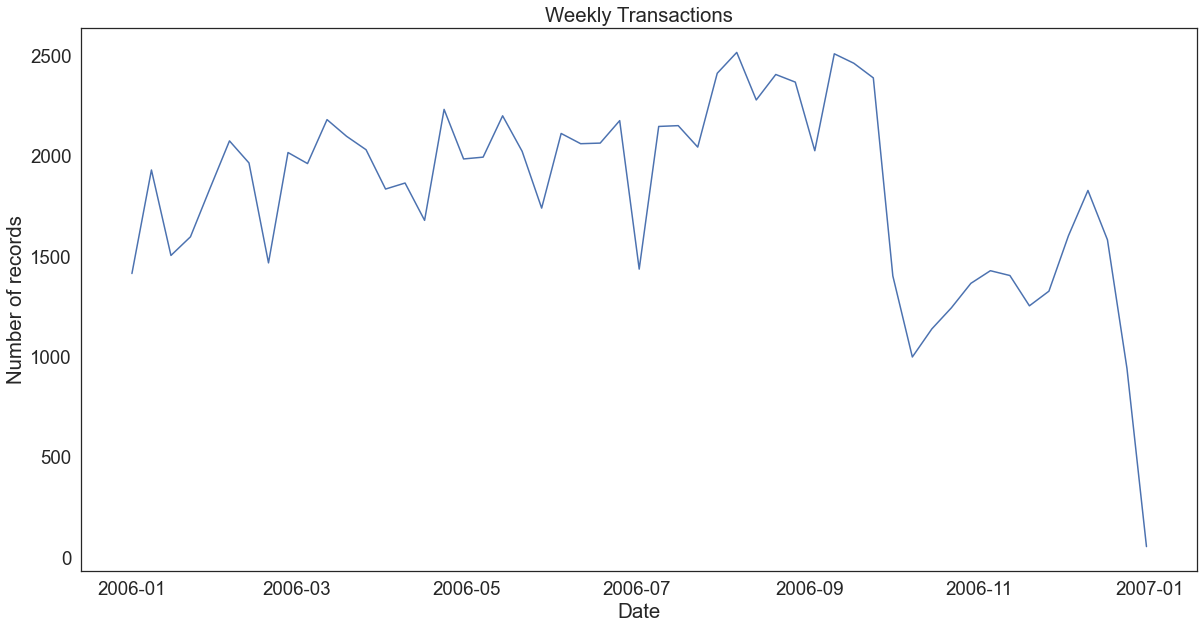

In [44]:
df['count'] = 1
count_by_date = df[['Date','count']].set_index('Date').resample(timedelta(days = 7)).count()['count']
sns.set(font_scale = 1.7)
plt.figure(figsize = (20,10))
sns.set_style('white')
sns.lineplot(x = count_by_date.index , y = count_by_date.values)
plt.title("Weekly Transactions")
plt.xlabel("Date")
plt.ylabel("Number of records")

Text(0, 0.5, 'Proportion of records')

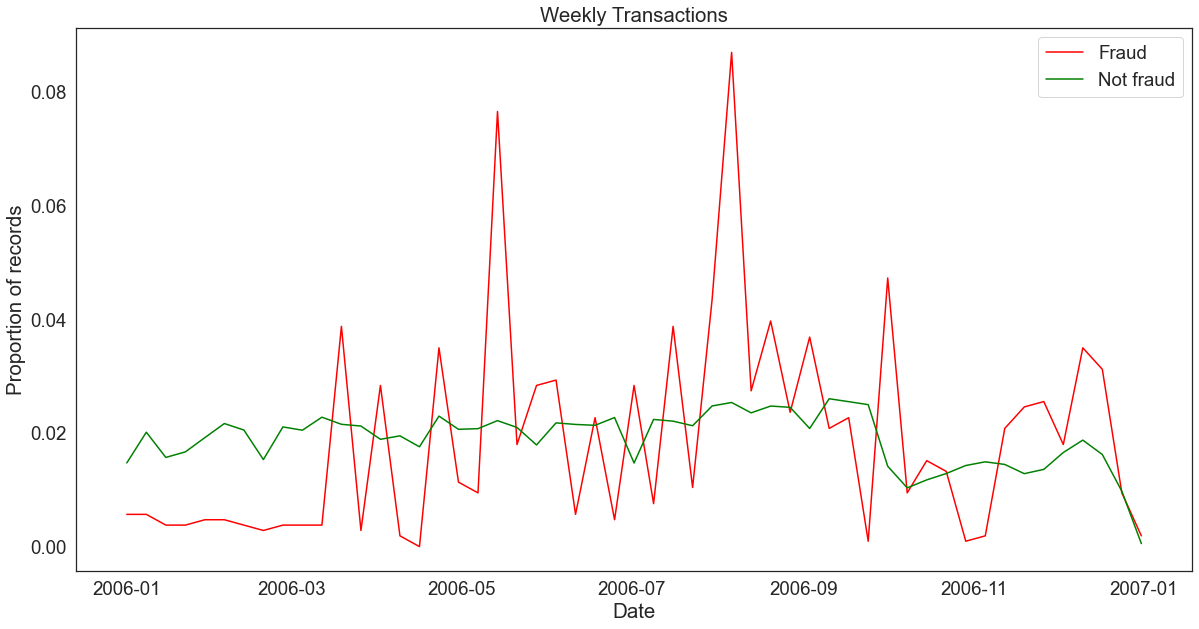

In [45]:
df_fraud = df[df['Fraud']==1]
df_not_fraud = df[df['Fraud']==0]
count_by_date_fraud = df_fraud[['Date','count']].set_index('Date').resample(timedelta(days = 7)).count()['count']
count_by_date_not_fraud = df_not_fraud[['Date','count']].set_index('Date').resample(timedelta(days = 7)).count()['count']
count_by_date_fraud = count_by_date_fraud/sum(count_by_date_fraud)
count_by_date_not_fraud = count_by_date_not_fraud/sum(count_by_date_not_fraud)
sns.set(font_scale = 1.7)
plt.figure(figsize = (20,10))
sns.set_style('white')
sns.lineplot(x = count_by_date_fraud.index , y = count_by_date_fraud.values, color = 'red',label = 'Fraud')
sns.lineplot(x = count_by_date_not_fraud.index , y = count_by_date_not_fraud.values, color = 'green',label = 'Not fraud')
plt.title("Weekly Transactions")
plt.xlabel("Date")
plt.ylabel("Proportion of records")

In [46]:
df['Date_month'] = df['Date'].dt.month
df['Date_week'] = df['Date'].dt.isocalendar().week

df['Date_week2'] = df['Date_week'].apply(lambda x: x%4)
df['Date_week2'] = np.where(df['Date_week2']==0,4,df['Date_week2'])

In [47]:
df['Date_week'].iloc[-1]

52

In [48]:
df.groupby(['Date_week2']).Recnum.count()

Date_week2
1    24540
2    24956
3    24076
4    23181
Name: Recnum, dtype: int64

In [49]:
#monday = 0, Sunday = 6
# df['Date'].dt.isocalendar().week.value_counts()


### Merchnum


<AxesSubplot:title={'center':'Top 15 Merchant Numbers'}, xlabel='Merch numbers', ylabel='Number of records '>

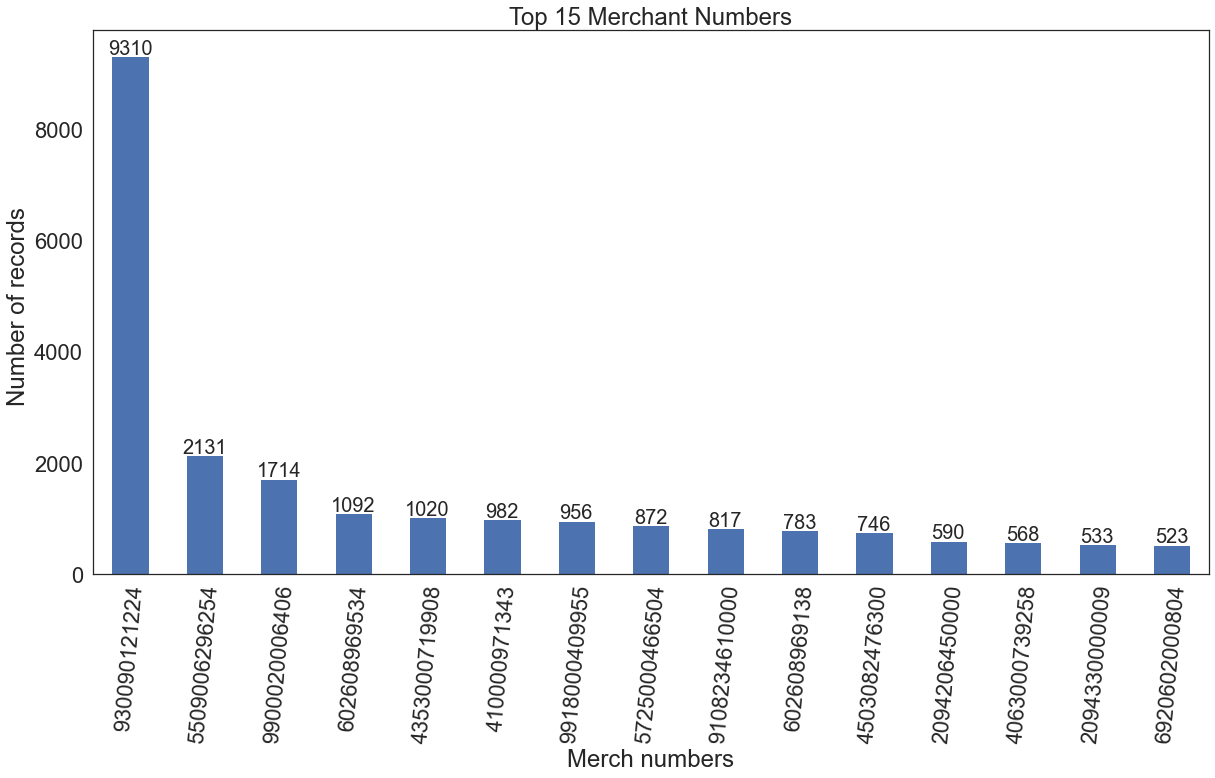

In [50]:
plotfield('Merchnum',annotate = True,title = 'Top 15 Merchant Numbers',ylabel = 'Number of records ',xlabel = 'Merch numbers',logscale = False,rotation = 85)

### Merch description


<AxesSubplot:title={'center':'Top 15 Merchant Names'}, xlabel='Number of records ', ylabel='Merchant Names'>

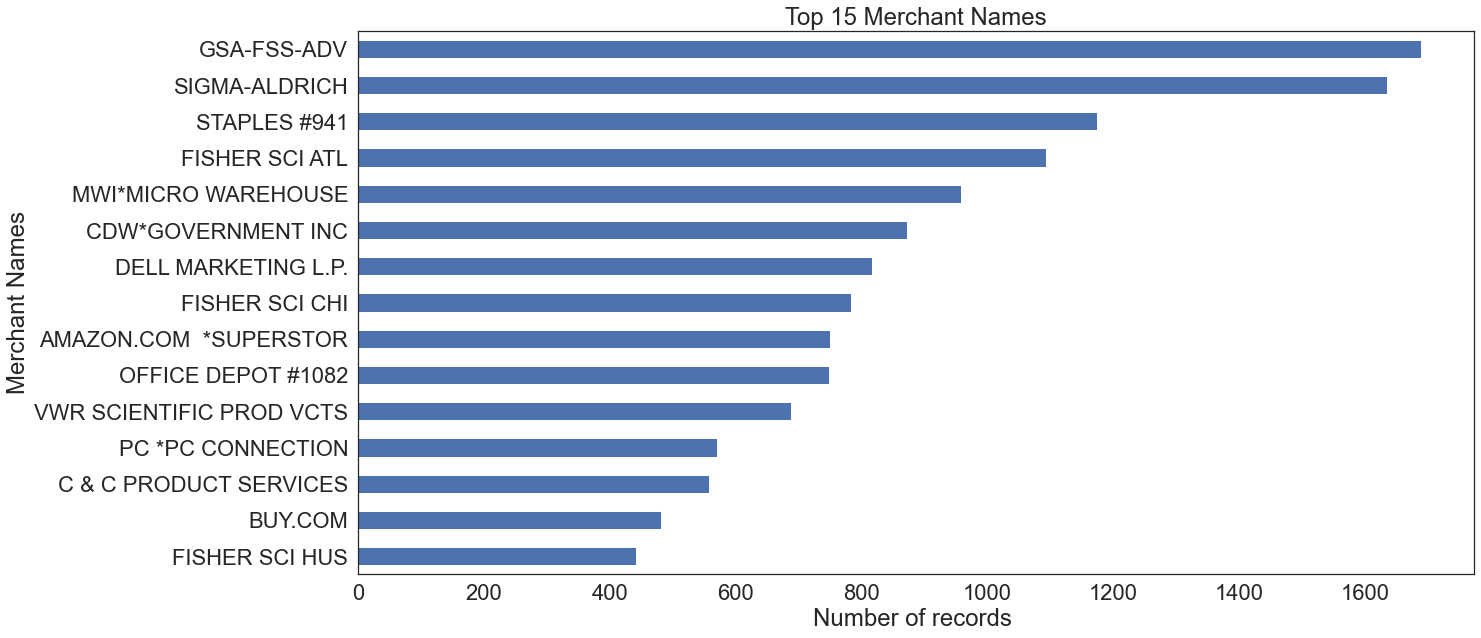

In [51]:
plotfield('Merch description',annotate = False,title = 'Top 15 Merchant Names',xlabel = 'Number of records ',ylabel = 'Merchant Names',logscale = False,rotation = 0,horizontal = True)

### Merch state


<AxesSubplot:title={'center':'Top 15 Merchant states'}, xlabel='Merchant States', ylabel='Number of records '>

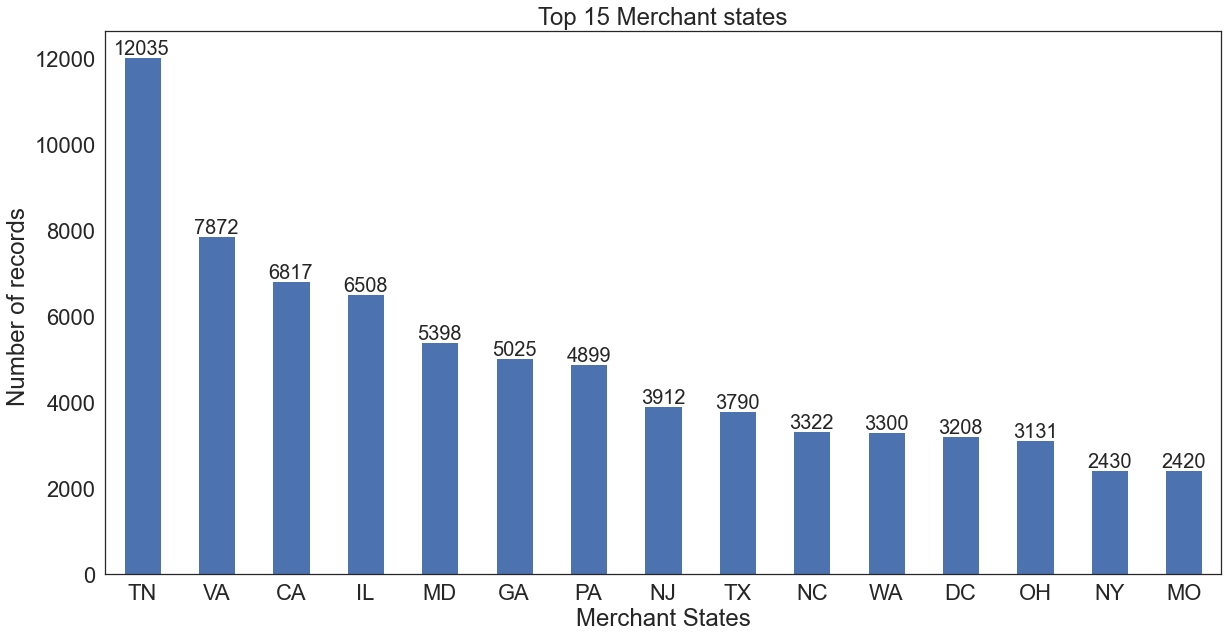

In [52]:
plotfield('Merch state',annotate = True,title = 'Top 15 Merchant states',ylabel = 'Number of records ',xlabel = 'Merchant States',logscale = False,rotation = 0)

### Merch zip


<AxesSubplot:title={'center':'Top 15 Merchant Zipcodes'}, xlabel='Merchant Zipcodes', ylabel='Number of records '>

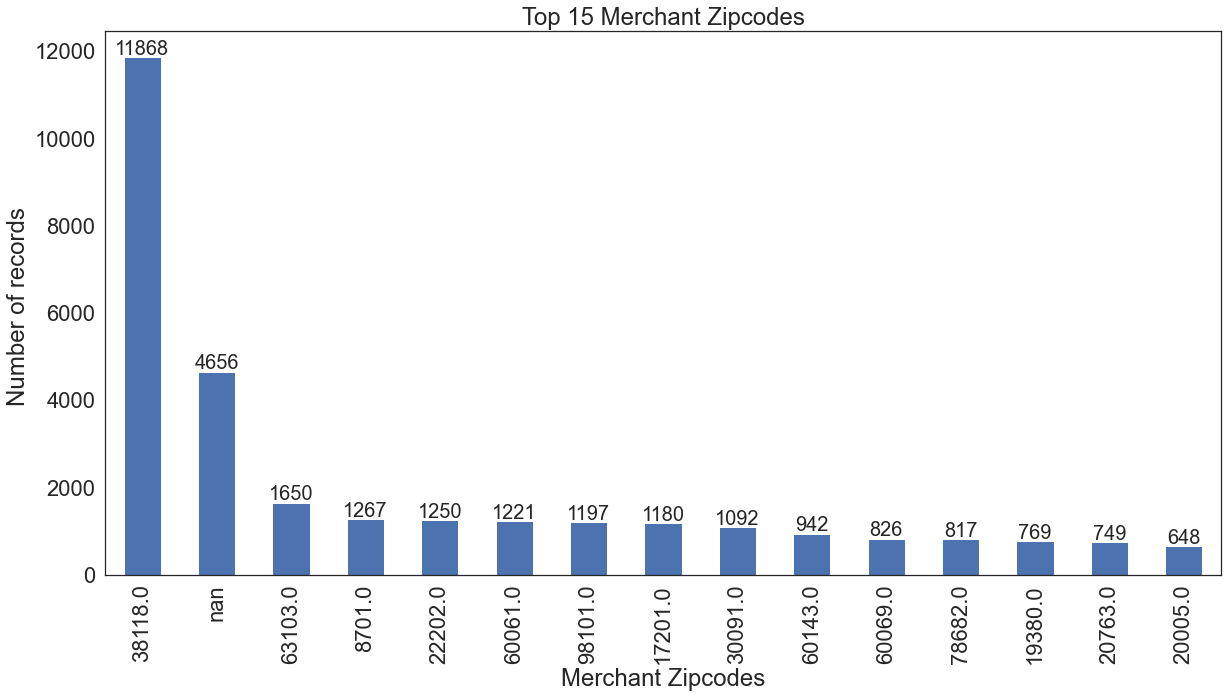

In [53]:
df['Merch zip'] = df['Merch zip'].apply(lambda x: int(x) if not pd.isnull(x) else x)
df['Merch zip'] = df['Merch zip'].astype('str')
plotfield('Merch zip',annotate = True,title = 'Top 15 Merchant Zipcodes',ylabel = 'Number of records ',xlabel = 'Merchant Zipcodes',logscale = False,rotation = 90)

### Transtype


<AxesSubplot:title={'center':'Distribution of transaction types'}, xlabel='Transaction Type', ylabel='Log scale of Number of records '>

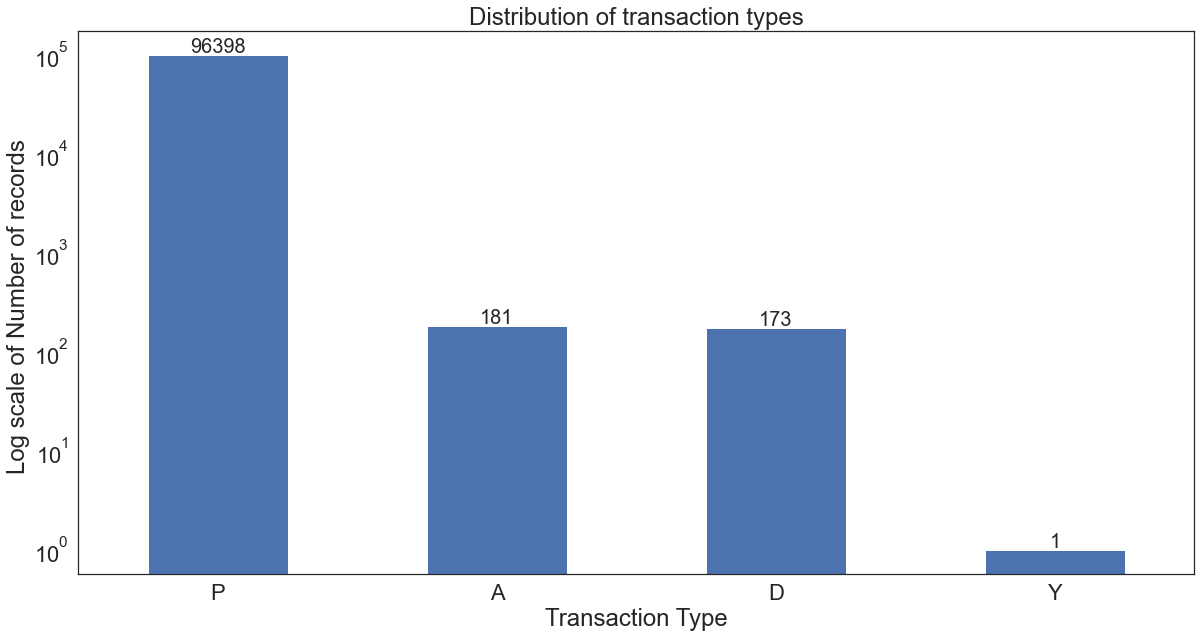

In [54]:
plotfield('Transtype',annotate = True,title = 'Distribution of transaction types',ylabel = 'Log scale of Number of records ',xlabel = 'Transaction Type',logscale = True,rotation = 0)

### Amount


In [55]:
len(df[df['Amount']<0.5*10**6])/numrecords

0.9999896644031709

<AxesSubplot:title={'center':'Distribution of Amount between 0 - 0.5 million'}, xlabel='Amount', ylabel='Log scale of Number of records '>

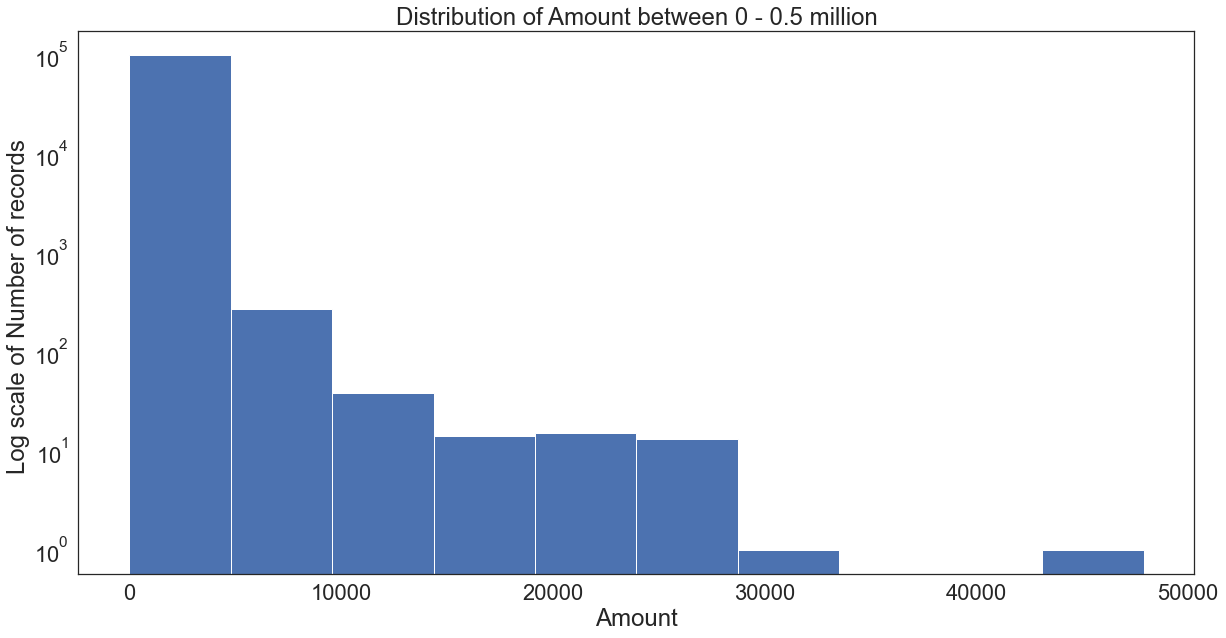

In [56]:
plotfield('Amount',annotate = False,title = 'Distribution of Amount between 0 - 0.5 million',ylabel = 'Log scale of Number of records ',xlabel = 'Amount',logscale = True,rotation = 0,isnum = True,removeOutliers = True,outlierLimit = (0,0.5*10**6))

### Fraud

<AxesSubplot:title={'center':'Distribution of Fraud'}, xlabel='Fraud', ylabel='Log scale of Number of records '>

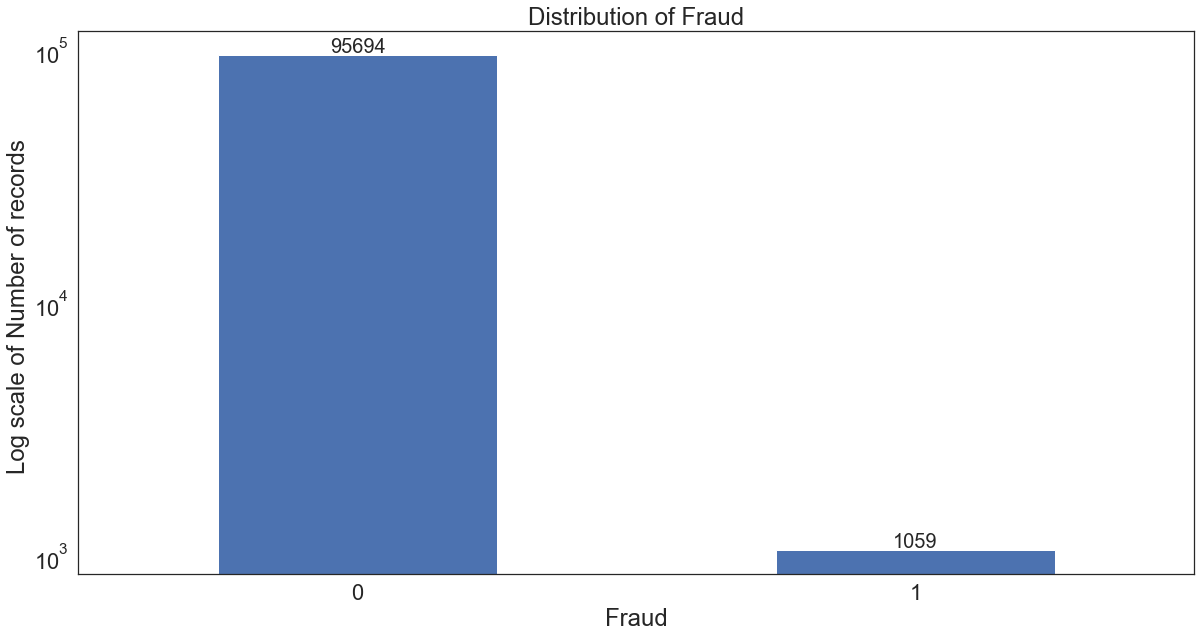

In [57]:
plotfield('Fraud',annotate = True,title = 'Distribution of Fraud',ylabel = 'Log scale of Number of records ',xlabel = 'Fraud',logscale = True,rotation = 0)